In [102]:
import numpy as np
import pandas as pd

In [103]:
df = pd.read_csv("german_credit_data.csv")
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [104]:
df["Credit amount"] = df["Credit amount"] /df["Credit amount"].abs().max()

In [105]:
df = pd.get_dummies(df)
df.head()

,Age,Job,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Saving accounts_little,...,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,2,0.063450,6,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,22,2,0.323003,48,1,0,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
2,49,1,0.113765,12,0,1,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
3,45,2,0.427812,42,0,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,53,2,0.264329,24,0,1,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0


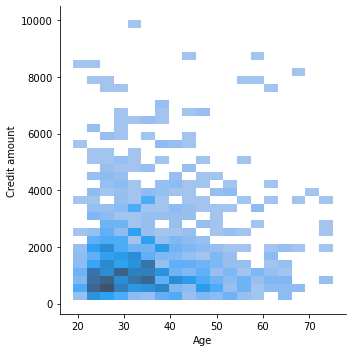

In [106]:
#plot normal distribution graph
import matplotlib.pyplot as plt
import seaborn as sns
y=df['Credit amount']*10000
sns.displot(x="Age", y=y, data=df, palette="Set2")

In [107]:
X = df.iloc[:, :24]
X = X.drop(['Credit amount'], axis=1)
X.head()

,Age,Job,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,...,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,2,6,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,22,2,48,1,0,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,49,1,12,0,1,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,45,2,42,0,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,53,2,24,0,1,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [108]:
y = df[["Credit amount"]];y.head()

,Credit amount
0,0.063450
1,0.323003
2,0.113765
3,0.427812
4,0.264329


In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [110]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [111]:
print(lin_reg.score(X_test, y_test))
print(lin_reg.score(X_train, y_train))

0.4617842317199732
0.4713856937846864


In [112]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.1)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.1)

In [113]:
print(ridge_reg.score(X_test, y_test))
print(ridge_reg.score(X_train, y_train))

0.46176402314388143
0.47138463499826166


In [114]:
from sklearn import svm
svr = svm.SVR(kernel="linear")
svr.fit(X_train, y_train)

C:\Users\batik\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR(kernel='linear')

In [115]:
print(svr.score(X_test, y_test))
print(svr.score(X_train, y_train))

0.4644060152974967
0.45161924101712436


In [116]:
from sklearn.linear_model import ElasticNet
elastic =  ElasticNet(alpha=0.1)
elastic.fit(X_train, y_train)

ElasticNet(alpha=0.1)

In [117]:
print(elastic.score(X_test, y_test))
print(elastic.score(X_train, y_train))

0.44738309570780255
0.3871004128673131


In [118]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.1, normalize=False)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [119]:
print(lasso.score(X_test, y_test))
print(lasso.score(X_train, y_train))

0.44969618943758716
0.38224342102964626


In [120]:
df.iloc[534]

Age                            25.00000
Job                             2.00000
Credit amount                   0.16853
Duration                       24.00000
Sex_female                      0.00000
Sex_male                        1.00000
Housing_free                    0.00000
Housing_own                     1.00000
Housing_rent                    0.00000
Saving accounts_little          0.00000
Saving accounts_moderate        0.00000
Saving accounts_quite rich      0.00000
Saving accounts_rich            0.00000
Checking account_little         0.00000
Checking account_moderate       0.00000
Checking account_rich           0.00000
Purpose_business                0.00000
Purpose_car                     0.00000
Purpose_domestic appliances     0.00000
Purpose_education               0.00000
Purpose_furniture/equipment     0.00000
Purpose_radio/TV                1.00000
Purpose_repairs                 0.00000
Purpose_vacation/others         0.00000
Name: 534, dtype: float64

In [121]:
pred = df.iloc[534].drop(['Credit amount'])
print(lin_reg.predict([pred]))
print(ridge_reg.predict([pred]))
print(svr.predict([pred]))
print(elastic.predict([pred]))
print(lasso.predict([pred]))

[[0.18040615]]
[[0.18033347]]
[0.17817028]
[0.19723155]
[0.20037307]


In [122]:
df.query("Sex_female == 1")["Credit amount"].mean()

0.15619703612398986

In [123]:
df.query("Sex_female == 0")["Credit amount"].mean()

0.18714940185139736

In [124]:
import random as rnd
import plotly.express as px
x1 = []
x2 = []


for i in range(0,100):
    ranp = rnd.randint(0,999)
    pred_df =df.iloc[ranp]
    pred = df.iloc[ranp].drop(['Credit amount'])
    x1.append(lin_reg.predict([pred]))
    x2.append(pred_df["Credit amount"])
x1 = np.array(x1)
x2 = np.array(x2)
x1=x1.flatten()
x2=x2.flatten()
fig = px.line(y=[x1,x2],title="Credit Amount")
fig.update_layout(
    xaxis_title="Kaçıncı Deneme",
    yaxis_title="Kredi Miktarı",
)
newname = {"wide_variable_0":"Predicted", "wide_variable_1":"Actual"}
fig.for_each_trace(lambda t: t.update(name = newname[t.name]))
fig.show()

In [125]:
corr = np.corrcoef(x1, x2)
corr = pd.DataFrame(corr, index=["Pred", "Test"], columns=["Pred", "Test"])

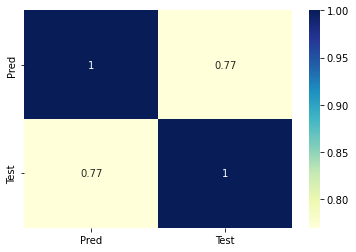

In [126]:
import seaborn as sns
dataplot = sns.heatmap(corr, annot=True, cmap="YlGnBu")